In [2]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
file = read.table('StatVillage.raw', colClasses = c("V4"="character"))
names = c('BLOCK', 'UNIT', 'HHSIZE', 'HHPER', 'NUEMPINH', 'NUIRH', 'EMPINCH', 'INVSTH', 'GOVINCH', 'OTINCH', 'TOTINCH', 'DTYPEH', 'BUILTH', 'TENURH', 'MORGH', 'ROOMH', 'BROOMH', 'VALUEH', 'GROSRTH', 'OMPH', 'HMAGE', 'HMSEX', 'HMMTN', 'HMHLOS', 'HMOCC91', 'HMLFACT', 'HMWKSWK', 'HMEMPIN', 'SHMAGE', 'SHMSEX', 'SHMMTN', 'SHMHLOS', 'SHMOCC91', 'SHMLFACT', 'SHMWKSW', 'SHMEMPIN')
colnames(file) = names

## Завдання 1 5 балів
Провести пробне обстеження домогосподарств Статвіліджа (Maximal
village - 128 blocks) із часткою відбору f=n/N=2% за допомогою простого випадкового
відбору без повернення. ОЦІНИТИ для своєї задачі:
1. Сумарне — одна змінна BROOMH;
2. Середнє – інша змінна ROOMH;
3. Пропорцію — ще одна змінна HMSEX;
4. Дисперсії генеральної сукупності () по всім трьом характеристикам, що будуть використовуватись у вашому обстеженні.
5. Дисперсії оцінок всіх трьох параметрів .

In [4]:
N = 1028
n  = N * 0.02
round(n)

[1] 21

Для аналізу відберемо 3 обстеження. 

In [5]:
set.seed(0)
x<- sample(1:1024,21)
first <- file[x,] 

In [6]:
colnames(first)

[1] "BLOCK"    "UNIT"     "HHSIZE"   "HHPER"    "NUEMPINH" "NUIRH"   
 [7] "EMPINCH"  "INVSTH"   "GOVINCH"  "OTINCH"   "TOTINCH"  "DTYPEH"  
[13] "BUILTH"   "TENURH"   "MORGH"    "ROOMH"    "BROOMH"   "VALUEH"  
[19] "GROSRTH"  "OMPH"     "HMAGE"    "HMSEX"    "HMMTN"    "HMHLOS"  
[25] "HMOCC91"  "HMLFACT"  "HMWKSWK"  "HMEMPIN"  "SHMAGE"   "SHMSEX"  
[31] "SHMMTN"   "SHMHLOS"  "SHMOCC91" "SHMLFACT" "SHMWKSW"  "SHMEMPIN"

Дані, які ми аналізуємо:

In [7]:
first[,c('BROOMH','ROOMH','HMSEX')]

,BROOMH,ROOMH,HMSEX
,<int>,<int>,<int>
398,4,7,1
1017,3,6,1
836,4,6,1
679,3,7,1
129,5,8,1
930,2,4,1
509,3,7,2
471,3,9,2
299,4,10,1


Знайдемо пункти 1,2,3 першого завдання

In [8]:
# 1,2,3
print(sum(first[,'BROOMH'])/21*1024)
print(mean(first[,'ROOMH']))
print(length(filter(first,HMSEX == 2)[,'HMSEX'])/length(first[,'HMSEX']))

[1] 2828.19
[1] 5.952381
[1] 0.2857143


Пукнт 4 нашого завдання

In [9]:
#4
print(var(file[,'BROOMH']))
print(var(file[,'ROOMH']))
print(var(file[,'HMSEX']))

[1] 1.330759
[1] 4.972981
[1] 0.2001839


Також знайдемо дисперсії параметрів нашої підвибірки

In [10]:
# dispersion from our subset
print(var(first[,'BROOMH']))
print(var(first[,'ROOMH']))
print(var(first[,'HMSEX']))

[1] 1.490476
[1] 3.947619
[1] 0.2142857


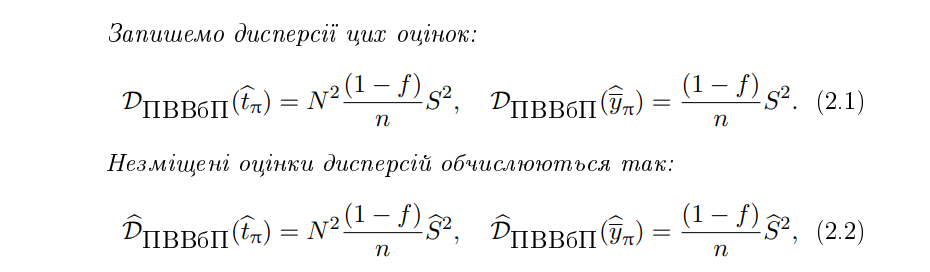
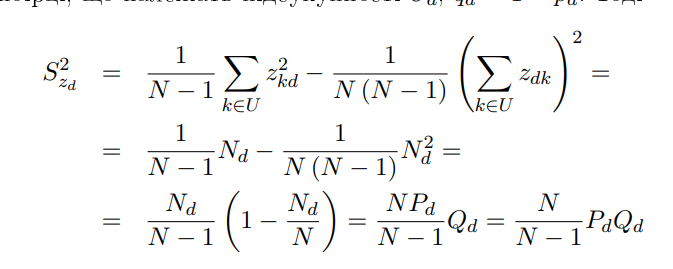

Застосуємо формули вище для обрахунки Дисперсії оцінок

In [53]:
# 5 
N <- 1024
n <- 21 
f <- 21/1024
print(N*N*(1-f)/n*var(first[,'BROOMH']))
print((1-f)/n*var(first[,'ROOMH']))
## було print(N/(N-1)*var(first[,'HMSEX'])*(1-var(first[,'HMSEX'])))
print((1-f)/(n-1)*var(first[,'HMSEX'])*(1-var(first[,'HMSEX'])))

[1] 72896.49
[1] 0.1841268
[1] 0.008245725


1. Сумарне -BROOMH = 2829;
2. Середнє - ROOMH = 5.952381;
3. Пропорції — MSEX = 0.2857143;
4. - var(BROOMH) = 1.330759
   - var(ROOMH) = 4.972981
   - var(HMSEX) = 0.2001839
5. Дисперсії оцінок всіх трьох параметрів.
    - BROOMH 72896.49
    - ROOMH 0.1841268
    - HMSEX 0.1767857 ( було 0.1685319)

## Завдання 2 6 балів
Підрахувати необхідний розмір вибірки, використовуючи інформацію з
пробного обстеження, для проведення повноцінного обстеження, якщо потрібно
оцінити ОДНОЧАСНО: параметри сумарного T та середнього з 95% вірогідністю та
відносною похибкою 20%, а параметр пропорція P (вимірюється у %) -- із
абсолютною допустимою похибкою 10% та 95% вірогідністю.

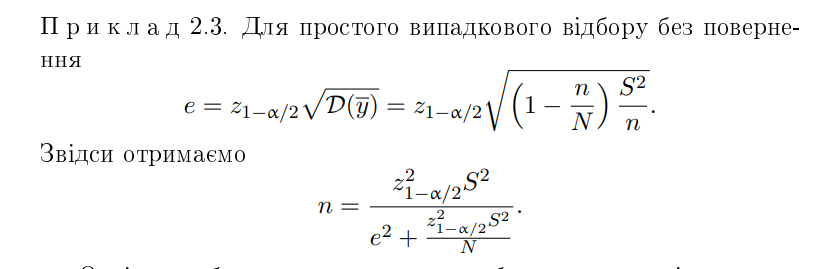

Замість дисперсії потрібних величин генеральної сукупності я використав дисперсії з п.1. , бо **використовуючи інформацію з пробного обстеження**

Порахуємо значення n для середнього ( формула вище)

Відносна похибка
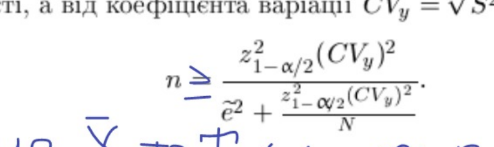

In [40]:
# Середнє
N <-1024
s <- sqrt(var(first[,'ROOMH']))/mean(first[,'ROOMH'])
# було s <- var(first[,'ROOMH'])
z <- 1.96
e <- 0.2
n <- z*z*s*s/(e*e+z*z*s*s/N) 
print(n)

[1] 10.58988


Формула для Сумарного виведена з формули 

$e =z*\sqrt{D(y)})$

$D(y) = \frac{N^2*(1-f)*var(змінна)}{n}$

var(змінна) = $S^2$

$n = \frac{S^2*N^2*z^2}{e^2+S^2*N*z^2}$ 

In [42]:
# Сумарне
N <-1024
S <- sqrt(var(first[,'BROOMH']))/mean(first[,'BROOMH'])
# було S <- var(first[,'BROOMH'])
z <-1.96
e <-0.2

n <- z*z*s*s/(e*e+z*z*s*s/N) 
# Я зрозумів чому у мене не виходило, так як я використовував іншу формулу(яку я виводив через дисперсію) 
n

[1] 10.58988

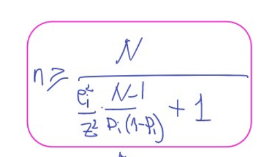

In [43]:
# пропорція
z <- 1.96
e <- 0.1
N <- 1024
p <- var(first[,'HMSEX'])
n <- N/(e^2/(z^2)*(N-1)/p+1)
n

[1] 76.2636

#### Старий: 

Судячи з вихідних задач для проведення нового обстеження варто обстежити всю генеральну сукупність(max 1024), але ми не будемо це робити так як тоді довірчі інтервали будуть однією точкою, а ми цього не хочемо. Але для пункту номер три для цікавості використаємо найбільше значення серед двох інших, а саме 277.

#### Новий: 

для того, щоб правильно оцінити всі параметри нам треба отримати 77 елементів вибірки

##  Завдання 3 5 балів
Провести повноцінне обстеження тієї кількості домогосподарств, що були
отримані в п. 2, оцінити дисперсії відповідних оцінок та побудувати 95% довірчі
інтервали для тих трьох параметрів, що Вас цікавлять в обстеженні.

In [44]:
x_sec <- sample(1:1024,277)
second <- file[x_sec,]
head(second[,c('BROOMH','ROOMH','HMSEX')])

,BROOMH,ROOMH,HMSEX
,<int>,<int>,<int>
841,2,4,1
591,2,4,2
725,2,4,2
37,4,10,1
105,5,8,1
729,3,10,1


Оцінка сумарного BROOMH,середнього ROOMH ,  та  пропорції HMSEX

In [45]:
print(round(sum(second[,'BROOMH'])/277*1024))
print(mean(second[,'ROOMH']))
print(length(filter(second,HMSEX == 2)[,'HMSEX'])/length(second[,'HMSEX']))

[1] 2917
[1] 6.617329
[1] 0.2527076


In [54]:
N <- 1024
n <-277
f <- n/N
print(N*N*(1-f)/n*var(file[,'BROOMH']))
print((1-f)/n*var(file[,'ROOMH']))
# заміна нижче формули. Було print(N/(N-1)*var(file[,'HMSEX'])*(1-var(second[,'HMSEX'])))
print((1-f)/(n-1)*var(file[,'HMSEX'])*(1-var(second[,'HMSEX'])))

[1] 3674.854
[1] 0.01309657
[1] 0.0004288221


# Довірчі інтервали

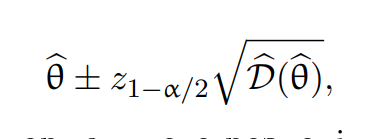

In [55]:
z <- 1.96
f <- 277/1024
N <- 1024
n <- 277
s1 <- N*N*(1-f)/n*var(second[,'BROOMH'])
s2 <- (1-f)/n*var(second[,'ROOMH'])
s3 <- (1-f)/(n-1)*var(second[,'HMSEX'])*(1-var(second[,'HMSEX']))
sigma1 <- round(sum(second[,'BROOMH'])/277*1024)
sigma2 <- mean(second[,'ROOMH'])
sigma3 <-length(filter(second,HMSEX == 2)[,'HMSEX'])/length(second[,'HMSEX'])
# Довірчі інтервали

cat('BROOMH sum [',sigma1-sqrt(s1),' , ',sigma1+sqrt(s1),']\n')
cat('ROOMH mean [',sigma2-sqrt(s2),' , ',sigma2+sqrt(s2),']\n')
cat('HMSEX proportion [',sigma3-sqrt(s3),' , ',sigma3+sqrt(s3),']\n')

BROOMH sum [ 2852.204  ,  2981.796 ]
ROOMH mean [ 6.497396  ,  6.737261 ]
HMSEX proportion [ 0.2325581  ,  0.2728571 ]


In [56]:
print(sum(file[,'BROOMH']))
print(mean(file[,'ROOMH']))
print(length(filter(file,HMSEX == 2)[,'HMSEX'])/length(file[,'HMSEX']))

[1] 3011
[1] 6.800781
[1] 0.2763672


## Завдання 4 -  4 бали
Порівняти отримані результати: як вони змінились, на скільки сильно, чому
це сталось. Зробити практичний висновок щодо тієї ситуації, що вимагала проведення
вибіркового обстеження.

Висновок:

як і очікувалось дисперсії оцінок при більшій кількості виборів( 21 vs 277) зменшились, як і треба було.
А також точність оцінки наблизилась ближче до нашого справжнього значення (див табличку)

Також збільшення розміру вибірки зменшило дисперсію


Порівняємо результати 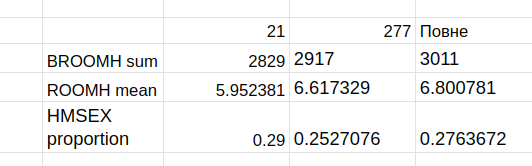

Практична порада:
Мій хлопець захоче переїхати, адже він шукає собі консервативну сімю з великою кількістю кімнат, а також оскільки він меблевик ліжок, кількість спален в яких він може замінити деталі доволі велика. 
